In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dropout, Dense, Flatten
from tensorflow.keras.optimizers import SGD
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils as u
from keras.datasets import cifar10

In [2]:
#Lets start by loading the Cifar10 data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [3]:
X_train.shape, X_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

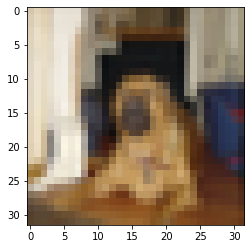

In [4]:
import matplotlib.pyplot as plt
plt.imshow((X_train[148])) #plottig an image for testing

In [5]:
X_train = X_train.astype('float32')/255.0
X_test =  X_test.astype('float32')/255.0

In [6]:
y_train = u.to_categorical(y_train, 10)
y_test = u.to_categorical(y_test, 10)

In [7]:
# Now we can go ahead and create our Convolution model
model = Sequential()
# We want to output 32 features maps. The kernel size is going to be #3x3 and 
# we specify our input shape to be 32x32 with 3 channels
# Padding=same means we want the same dimensional output as input
# activation specifies the activation function
model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), padding='same', activation='relu'))
#20% of the nodes are set to 0
model.add(Dropout(0.2))
#now we add another convolution layer, again with a 3x3 kernel
#padding=valid this means that the output dimension can take any form
model.add(Conv2D(32, (3, 3), activation='relu', padding='valid'))
#maxpool with a kernet of 2x2

In [8]:
model.add(MaxPooling2D(pool_size=(2, 2)))
#we neet to flatten our data before we can
#input it into the ouput/dense layer
model.add(Flatten())
#Dense layer with 512 hidden units
model.add(Dense(512, activation='relu'))
#this time we set 30% of the nodes to 0 to minimize overfitting
model.add(Dropout(0.3))
#Finally the output dense layer with 10 hidden units corresponding to our 10 classe
model.add(Dense(10, activation='softmax'))

In [9]:
#Few simple configurations
epochs = 5
lrate = 0.01
decay = lrate/epochs
sgd = SGD(learning_rate=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [10]:
model.compile?

In [11]:
#Run the algorithm!
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=64)

Epoch 1/5
782/782 [==============================] - 107s 135ms/step - loss: 1.6873 - accuracy: 0.3923 - val_loss: 1.4287 - val_accuracy: 0.4938
Epoch 2/5
782/782 [==============================] - 106s 136ms/step - loss: 1.3558 - accuracy: 0.5116 - val_loss: 1.2521 - val_accuracy: 0.5617
Epoch 3/5
782/782 [==============================] - 106s 135ms/step - loss: 1.2241 - accuracy: 0.5640 - val_loss: 1.1825 - val_accuracy: 0.5851
Epoch 4/5
782/782 [==============================] - 106s 136ms/step - loss: 1.1396 - accuracy: 0.5990 - val_loss: 1.1303 - val_accuracy: 0.6023
Epoch 5/5
782/782 [==============================] - 105s 135ms/step - loss: 1.0777 - accuracy: 0.6194 - val_loss: 1.1006 - val_accuracy: 0.6145


In [12]:
#print(model.predict_classes(X_test[0:5]))
predictions = np.argmax(model.predict(X_test[0:5]), axis=1)
predictions

1/1 [==============================] - 0s 312ms/step


array([3, 8, 8, 0, 4], dtype=int64)

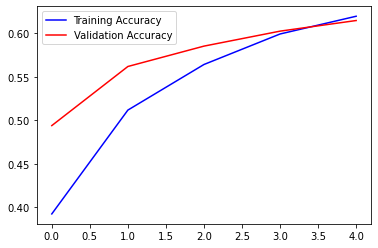

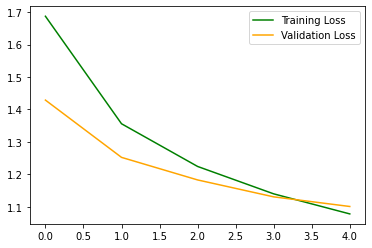

In [13]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(range(epochs), acc, "b", label="Training Accuracy")
plt.plot(range(epochs), val_acc, "r", label="Validation Accuracy")
plt.legend()

plt.figure()
plt.plot(range(epochs), loss, "g", label="Training Loss")
plt.plot(range(epochs), val_loss, "orange", label="Validation Loss")
plt.legend()

plt.show()